In [93]:
# 네이버 블로그 키워드 분석
from pyparsing.helpers import original_text_for
import os 
import sys
import urllib.request
import pandas as pd
import json
import re

client_id = 'swMRG8plbs7LYwkTMHoz'
client_secret = 'jV02Ini3sh'

query = urllib.parse.quote(input("검색 질의: ")) #parse 해주는 이유 사용자 입력값 url로 넣을 수 있는 형태로 변환
idx = 0 
display = 100
start = 1 
end =1000    #네이버 최대 보여줄 수 있는 건 수 1000개
sort = 'sim'  #유사도순으로 정렬

blog_df = pd.DataFrame(columns=('Title','Link','Description','Blogger Name', 'Blogger Link'))

for start_index in range(start, end, display):


  url = 'https://openapi.naver.com/v1/search/blog?query=' + query \
    + '&display=' + str(display) + '&start=' + str(start_index) + '&sort=' + sort

  request = urllib.request.Request(url)    #요청
  request.add_header('X-Naver-Client-Id', client_id)
  request.add_header('X-Naver-Client-Secret',client_secret)
  response = urllib.request.urlopen(request)
  rescode = response.getcode()

  if(rescode==200):
    response_body = response.read()
    response_dict = json.loads(response_body.decode('utf-8'))
    items = response_dict['items']
    for item_index in range(0, len(items)):
      remove_tag = re.compile('<.*?>')              # html 태그 특수기호 제거
      title = re.sub(remove_tag, '', items[item_index]['title'])
      link = items[item_index]['link']
      description = re.sub(remove_tag, '', items[item_index]['description'])
      blogger_name = items[item_index]['bloggername']
      blogger_link = items[item_index]['bloggerlink']
      blog_df.loc[idx] = [title, link, description , blogger_name,blogger_link]
      idx += 1
  else :
    print("Error Code: " + rescode)

                                                      

   
blog_df

검색 질의: 인천여행|90년대생|청년


,Title,Link,Description,Blogger Name,Blogger Link
0,인천지역90년대생 여성노동자 실태조사 토론회,https://blog.naver.com/icwwa/222801079093,"'차별에 균열을, 노동에 성평등을' 인천지역 90년대생 토론회가 7월21일(목요일)...",인천여성노동자회,blog.naver.com/icwwa
1,(00後)&gt; &apos;90년대생과도 달라&apos; 현실적이고 합리적인 애국...,https://blog.naver.com/china_lab/222782734450,"21세기가 도래하자 1980년대생인 바링허우(80後), 90년대생인 주링허우(90後...",CHINA LAB,blog.naver.com/china_lab
2,90년대생 그들의 꿈을 이야기하다.,https://blog.naver.com/codi1215/222798251609,그런 세상에서는 다양한 생각을 하는 청년이 좀 더 많아졌으면 좋겠습니다.그리고 그 ...,(주)삼일리얼티/ 리즈의 닥터부동산TV,blog.naver.com/codi1215
3,무조건 짠테크? 90년대생에게 맞는 재테크는 따로 있다!,https://blog.naver.com/daishin_blog/221607529364,"자기계발, 여행 비용 등이 포함됩니다. 꾸밈비는 말 그대로 의류, 미용 등 나를 꾸...",대신증권 공식 블로그,blog.naver.com/daishin_blog
4,문경 양파밭 폐가에 8만명 몰렸다…90년대생 5인의 기적,https://blog.naver.com/ddanggut/222916348997,20년간 방치되던 고택을 90년대생 다섯이 되살렸다. ［사진 리플레이스］ 경북 문경...,천방지축 건축가,blog.naver.com/ddanggut
...,...,...,...,...,...
995,숲이 말을 걸었다 정복할 생각말고 그저 쉬었다 가라고,https://blog.naver.com/shaolinchef/221044637704,반응이90명♥인천 초등생 살해범 김양 변호인 “자괴감 든다…어서 재판 끝났으면”71...,.소림빵장과 함께하는 추억의 중국요리,blog.naver.com/shaolinchef
996,Y 뉴스 제13권 3호 (통권 43호). 1990년 9월 17일,https://blog.naver.com/johnkchung/40112096382,"서울, 인천, 대전에서 교회와 고아원, 양로워, 정박원을 방문하여 주님의 사랑을 나...",In Memory of Choon Y. Chung,blog.naver.com/johnkchung
997,2011-07-04 주간경제 Brief,https://blog.naver.com/money-story73/50114968259,인천공항 새 터미널 '봉황 두 마리'가 뜬다 조선일보 2011-06-27(월) 20...,Money Story,blog.naver.com/money-story73
998,2016년 7월 20일 수요일 오늘의 주요 신문사설·칼럼,https://cwsjames.tistory.com/377,"충남도는 인천·부산시와 9, 10월쯤 전기요금 차등제 도입 공청회를 열고 정부에 관...",늙은최군 :: 늙은최군,https://cwsjames.tistory.com/


In [94]:
blog = []
for b in blog_df.Description:
  blog.append(b)


print(blog[:5])

["'차별에 균열을, 노동에 성평등을' 인천지역 90년대생 토론회가 7월21일(목요일) 온/오프로 진행됩니다. 작년에 여성노동자회에서 전국을 대상으로 조사한 자료에서 인천지역 청년노동자들의 사례를... ", '21세기가 도래하자 1980년대생인 바링허우(80後), 90년대생인 주링허우(90後)가 사회 전면에 등장하기... 해외여행을 수시로 다니며 명품을 거리낌 없이 소비했다. 이제 2000년대 출생자 링링허우(00後)가 새로운... ', '그런 세상에서는 다양한 생각을 하는 청년이 좀 더 많아졌으면 좋겠습니다.그리고 그 다양한 선택들을 응원하고 지지해주는 어른들이 많아졌으면 좋겠습니다. https://youtu.be/CVp_iDr404c #90년대생의꿈... ', '자기계발, 여행 비용 등이 포함됩니다. 꾸밈비는 말 그대로 의류, 미용 등 나를 꾸미기 위해 드는... (사진 출처: 청년정책 블로그) 지금까지 대신증권과 함께 90년대생을 위한 돈 관리 노하우에 대해... ', '20년간 방치되던 고택을 90년대생 다섯이 되살렸다. ［사진 리플레이스］ 경북 문경시는 29년 뒤 사라질... 1막-고자재로 해체될 뻔한 200년 된 한옥 한옥은 인천 채씨의 집성촌이던 동네 입구에 있다. 1790년에... ']


In [101]:
stop_words = '세계 오늘 추천 생활 여기 마음 회사 작년 저자 센터 이해 세상 요즘 장 듯 취업 기자 나라 지역 작가 문 가능 경기 일본 시절 간 대표 뉴스 하우스 공정 최근 위 당시 대학 기업 도 점 하나 지원 부산 문제 학교 여성 돈 책 집 때문 편 앞장 처음 이유 속 이 제 데 이후 시작 경제 차 이야기 창업 생각 시대 해외 인천광역시 대생 청년 세대 대 중국 그 사람 사회 말 한국 미국 서울 해외여행 겨울 유럽 세 성인 싱 금 파리 프로 듀 한국인 최초 항해사 환경 지구 랩 프로 듀 그린피스 인천 이곳 청소년 공간 다누 이달 휴먼 여름 방학 회관 엄선 개 코로나 북 길 호 티 웨이 후 운항 말씀 스케줄 후 여행 일 월 시간 공항 도착 나 년 때 수 시 날 만 분 비행기 것 정 거 전 번 이번 우리 박 곳 내 중 정도 리 이상 자리 거리 위치 유명 서쪽 소개 주 원 층 등 끝 게 명 저'
stop_words = stop_words.split(' ')
print(stop_words)

['세계', '오늘', '추천', '생활', '여기', '마음', '회사', '작년', '저자', '센터', '이해', '세상', '요즘', '장', '듯', '취업', '기자', '나라', '지역', '작가', '문', '가능', '경기', '일본', '시절', '간', '대표', '뉴스', '하우스', '공정', '최근', '위', '당시', '대학', '기업', '도', '점', '하나', '지원', '부산', '문제', '학교', '여성', '돈', '책', '집', '때문', '편', '앞장', '처음', '이유', '속', '이', '제', '데', '이후', '시작', '경제', '차', '이야기', '창업', '생각', '시대', '해외', '인천광역시', '대생', '청년', '세대', '대', '중국', '그', '사람', '사회', '말', '한국', '미국', '서울', '해외여행', '겨울', '유럽', '세', '성인', '싱', '금', '파리', '프로', '듀', '한국인', '최초', '항해사', '환경', '지구', '랩', '프로', '듀', '그린피스', '인천', '이곳', '청소년', '공간', '다누', '이달', '휴먼', '여름', '방학', '회관', '엄선', '개', '코로나', '북', '길', '호', '티', '웨이', '후', '운항', '말씀', '스케줄', '후', '여행', '일', '월', '시간', '공항', '도착', '나', '년', '때', '수', '시', '날', '만', '분', '비행기', '것', '정', '거', '전', '번', '이번', '우리', '박', '곳', '내', '중', '정도', '리', '이상', '자리', '거리', '위치', '유명', '서쪽', '소개', '주', '원', '층', '등', '끝', '게', '명', '저']


In [102]:
tagger = Mecab()
blog_nouns = []
for b in blog:
  for noun in tagger.nouns(b):
    if noun not in stop_words:
      blog_nouns.append(noun)

blog_nouns[:10]

['차별', '균열', '노동', '성', '평등', '토론회', '목요일', '오프', '진행', '노동']

In [103]:
from collections import Counter
blog_nouns_counter = Counter(blog_nouns)
top_blog_nouns = dict(blog_nouns_counter.most_common(100))
top_blog_nouns

{'추억': 63,
 '카페': 61,
 '사진': 49,
 '문화': 41,
 '친구': 32,
 '시장': 30,
 '경험': 28,
 '도시': 28,
 '영화': 27,
 '노래': 26,
 '가족': 24,
 '삶': 23,
 '맛집': 23,
 '기억': 22,
 '사랑': 22,
 '호텔': 22,
 '교육': 21,
 '성장': 21,
 '감성': 19,
 '글': 19,
 '관련': 19,
 '자신': 19,
 '밀레': 19,
 '니얼': 19,
 '허우': 18,
 '앞': 18,
 '단체': 18,
 '나이': 18,
 '눈': 18,
 '아침': 18,
 '인': 18,
 '러브': 18,
 '차이': 18,
 '부': 18,
 '대구': 18,
 '조선': 18,
 '지금': 17,
 '국제공항': 17,
 '직장': 17,
 '자유': 17,
 '성공': 17,
 '특징': 17,
 '기성': 17,
 '공감': 17,
 '대한민국': 17,
 '살': 17,
 '어디': 17,
 '마지막': 17,
 '꿈': 16,
 '출처': 16,
 '사태': 16,
 '적': 16,
 '중심': 16,
 '아이': 16,
 '수학여행': 16,
 '역사': 16,
 '국민': 16,
 '차이나타운': 16,
 '최소': 16,
 '엄마': 16,
 '결혼': 16,
 '신혼': 16,
 '사업': 16,
 '미래': 16,
 '달': 16,
 '베트남': 16,
 '의료': 16,
 '조사': 15,
 '자기': 15,
 '정책': 15,
 '씨': 15,
 '동네': 15,
 '부모': 15,
 '경기도': 15,
 '운영': 15,
 '출발': 15,
 '자연': 15,
 '최고': 15,
 '얘기': 15,
 '청년층': 15,
 '맛': 15,
 '선택': 14,
 '무엇': 14,
 '천': 14,
 '실업': 14,
 '과거': 14,
 '방문': 14,
 '최대': 14,
 '정부': 14,
 '남자': 14,
 '이거': 14,

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


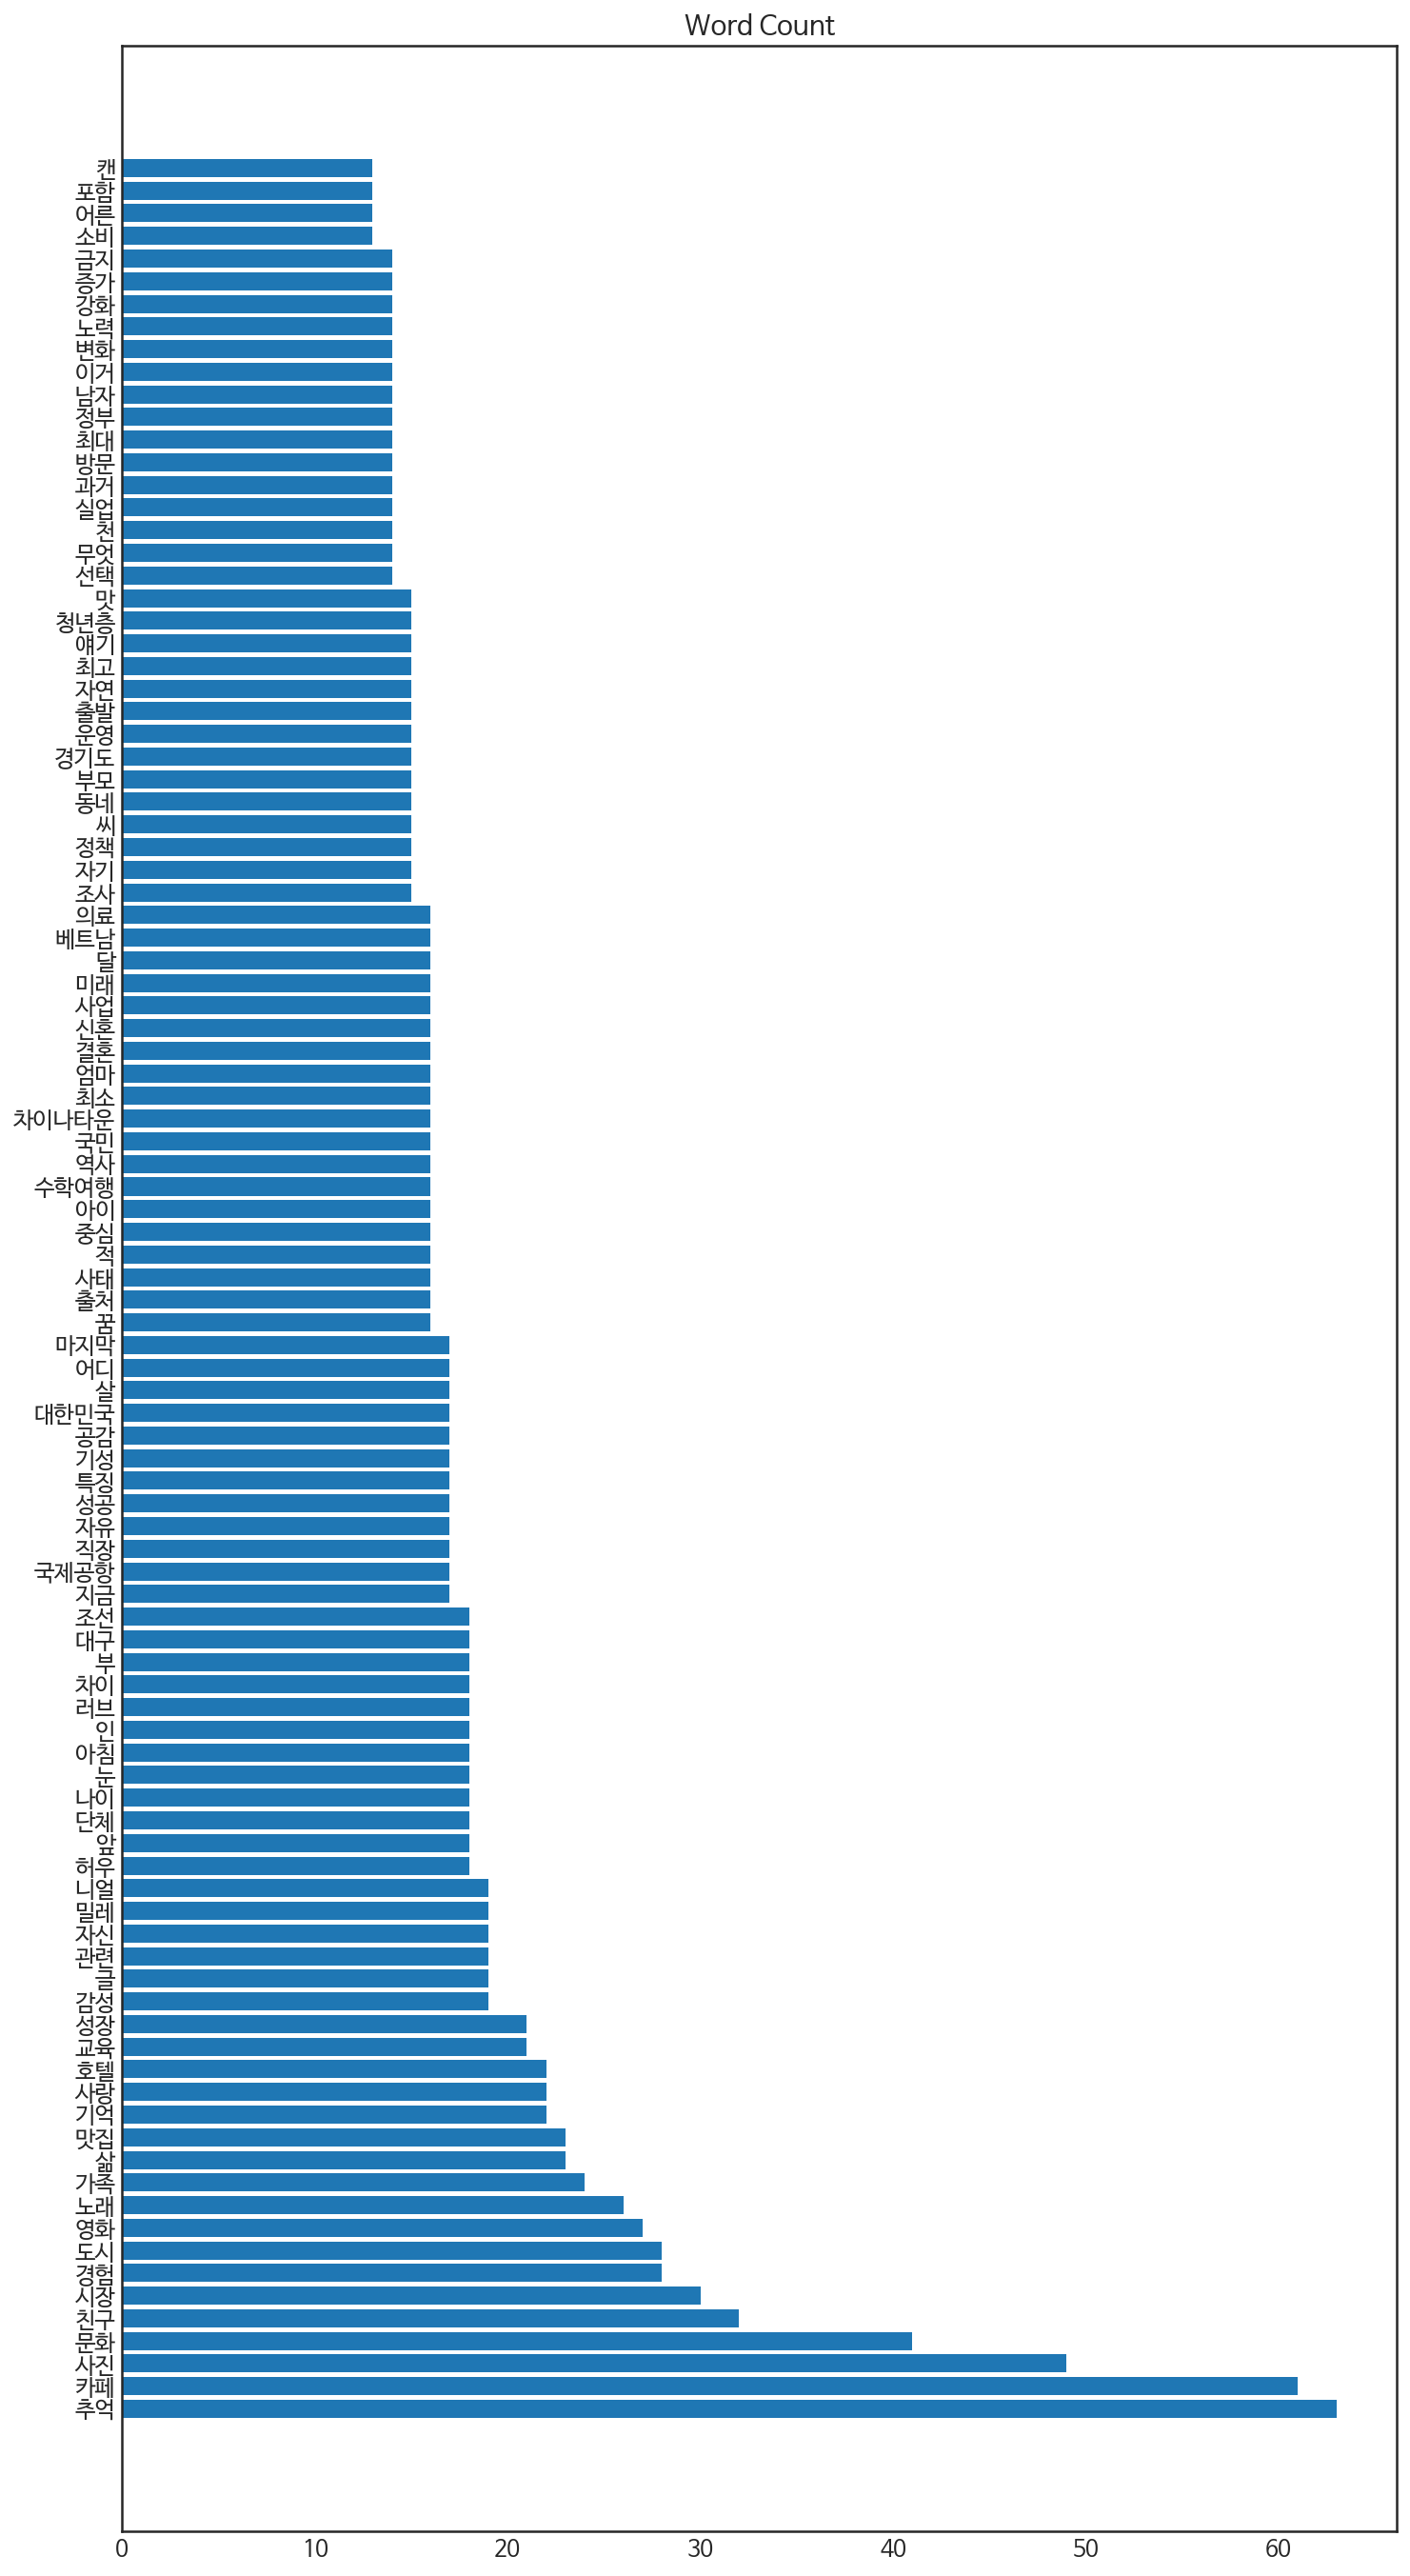

In [104]:
#단어 빈도 시각화
plt.rcParams['font.size'] = 12

y_pos = np.arange(len(top_blog_nouns))

plt.figure(figsize=(12,24))
plt.barh(y_pos,top_blog_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos,top_blog_nouns.keys())
plt.show()

In [ ]:
#!pip install squarify

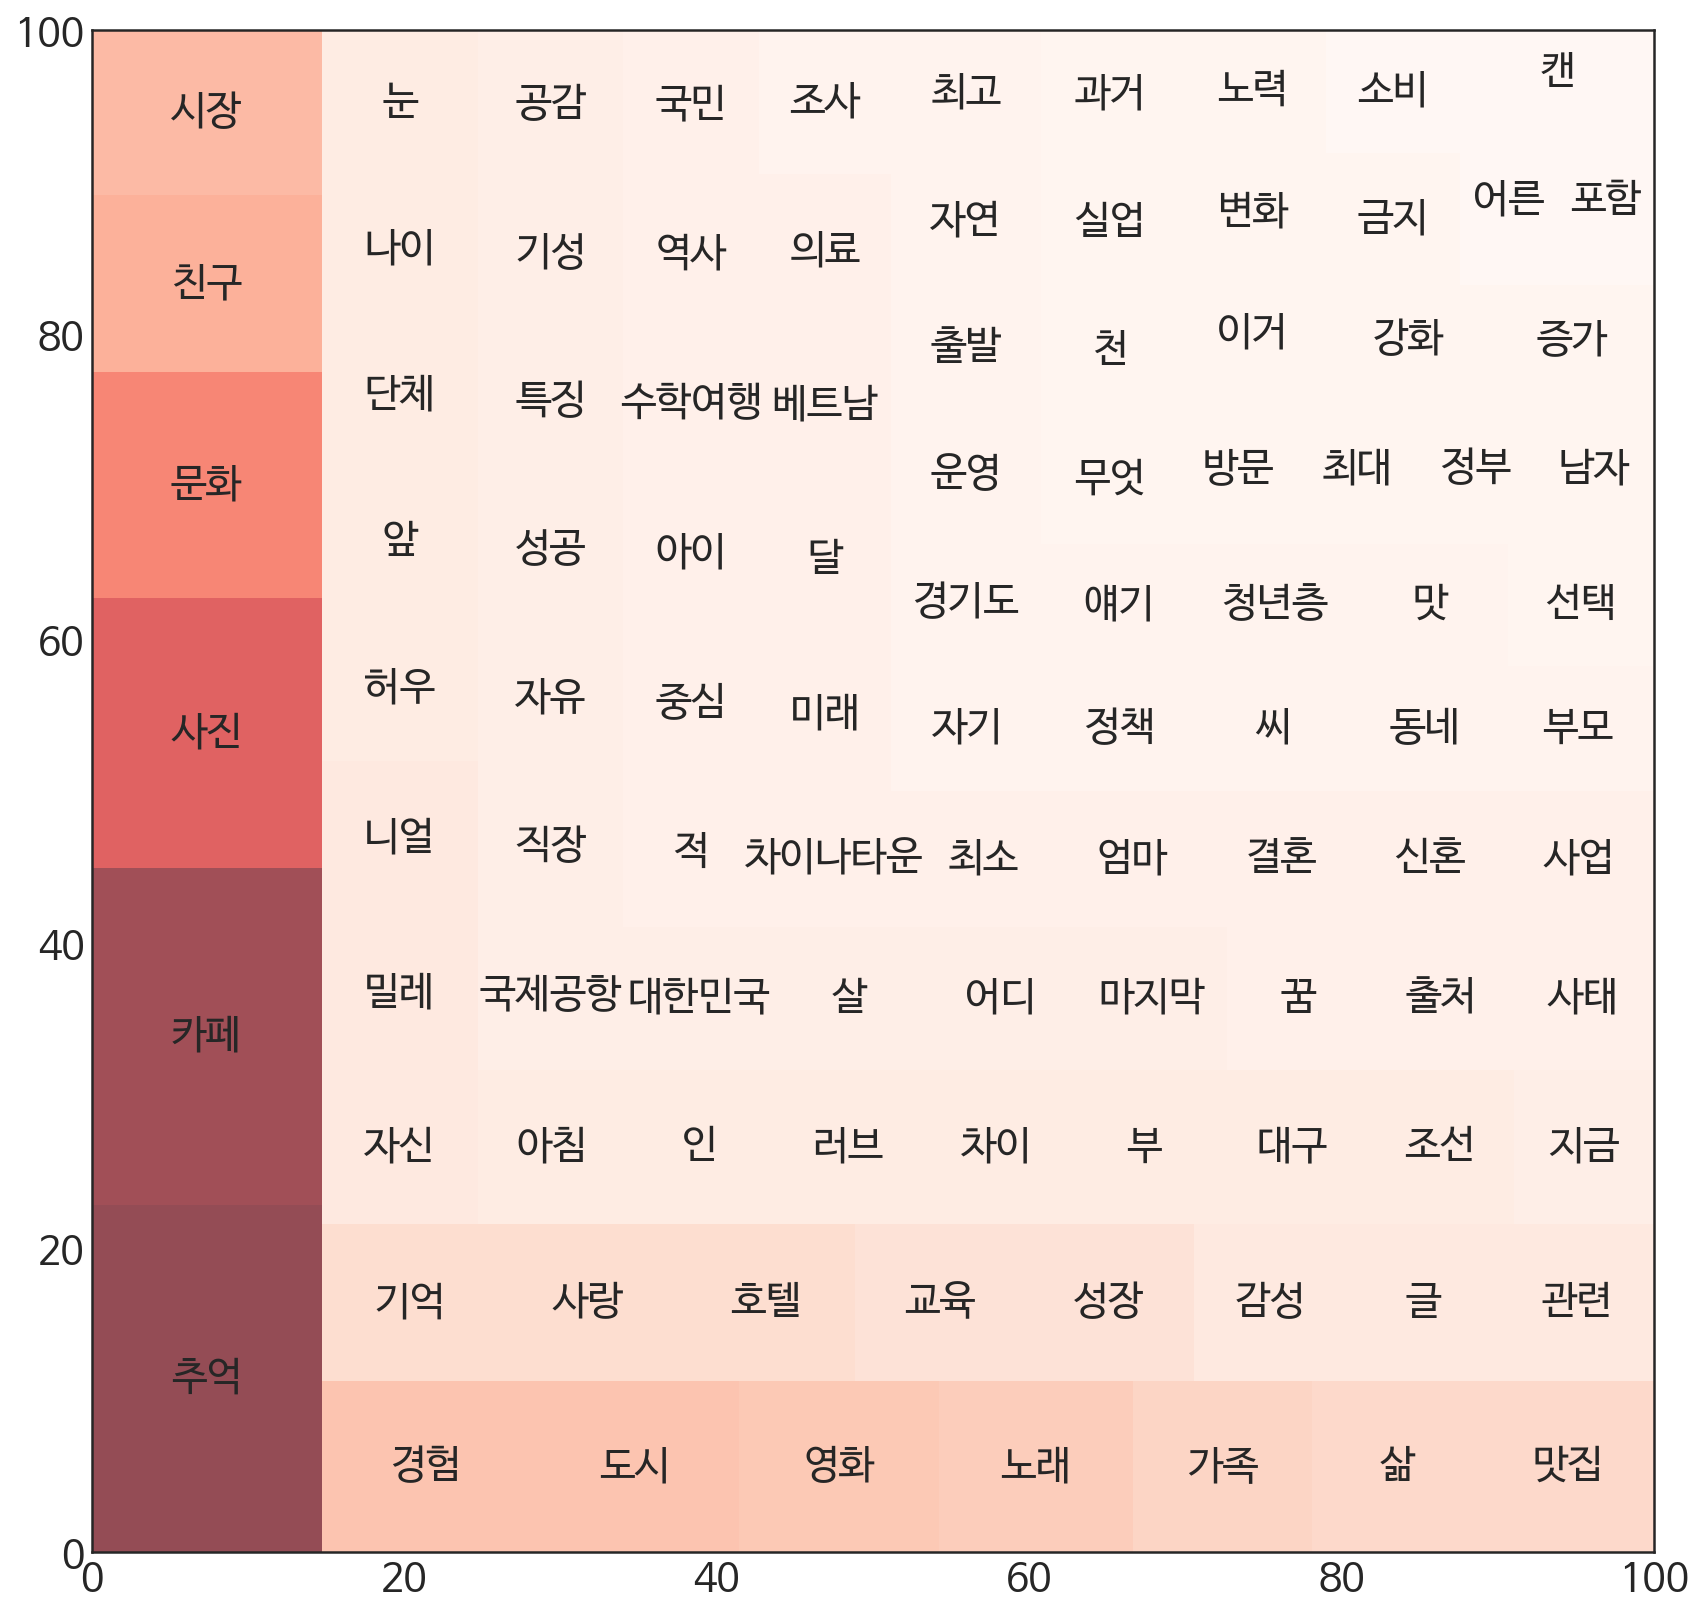

In [105]:

import squarify
plt.rcParams['figure.figsize'] = (14,14)
plt.rcParams['font.size'] = 20

norm = mpl.colors.Normalize(vmin = min(top_blog_nouns.values()), 
                            vmax = max(top_blog_nouns.values()))
colors = [mpl.cm.Reds(norm(value)) for value in top_blog_nouns.values()]

squarify.plot(label = top_blog_nouns.keys(),
              sizes= top_blog_nouns.values(),
              color = colors,
              alpha =.7);


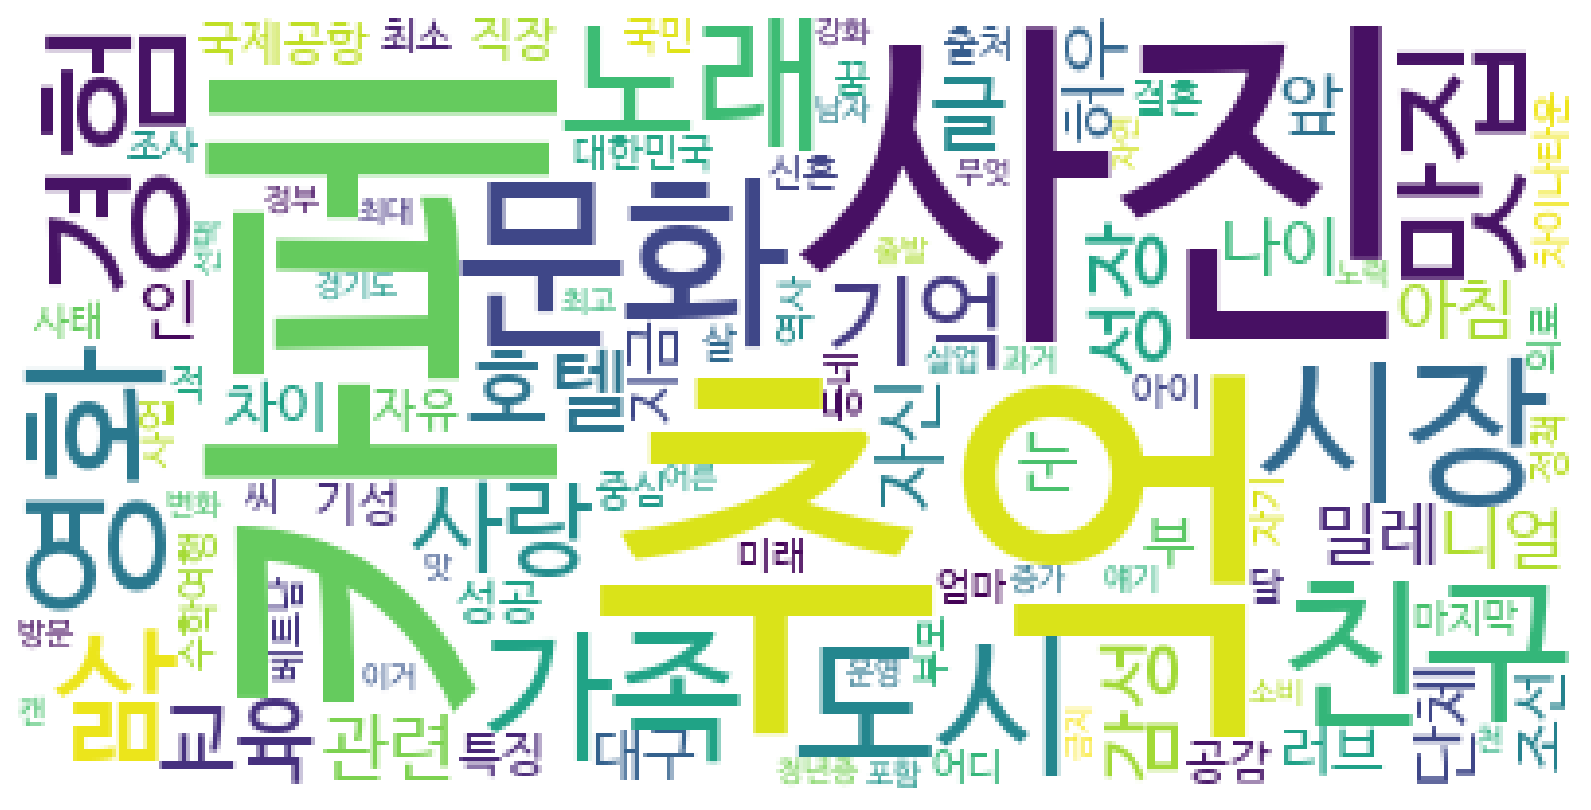

In [106]:
from wordcloud import WordCloud
wc = WordCloud(background_color = 'white', font_path = './font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_blog_nouns)

figure = plt.figure(figsize=(14,14))
ax = figure.add_subplot(1,1,1)
ax.axis('off')
ax.imshow(wc)
plt.show()